In [1]:
import pandas as pd
import numpy as np

In [4]:
Question = "Q2"
train_path = f'data/nzqa/Training/train_S2{Question}.csv'
test_path = f'data/nzqa/Test/test_S2{Question}.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

#cleanning - remove empty essays
train_df['Response'] = train_df['Response'].fillna('')
test_df['Response'] = test_df['Response'].fillna('')

train_df.shape

(3106, 6)

In [5]:
train_df.head()

,Unique_ID,Response,Q2_AC,Q2_CO,Q2_LA,Q2_ST
0,6810901775,The Ups And Downs Of School Homework. \n \nIs ...,3,3,3,3
1,6812396907,"In the majority of schools around the globe, s...",3,3,3,3
2,6612442013,I believe that homework is a wast of time. Whe...,3,3,3,3
3,6814308384,\nGood afternoon Westlake Girls high school s...,2,3,3,3
4,6814216893,Why homework is a waste of time.\n \nHello fel...,2,3,3,3


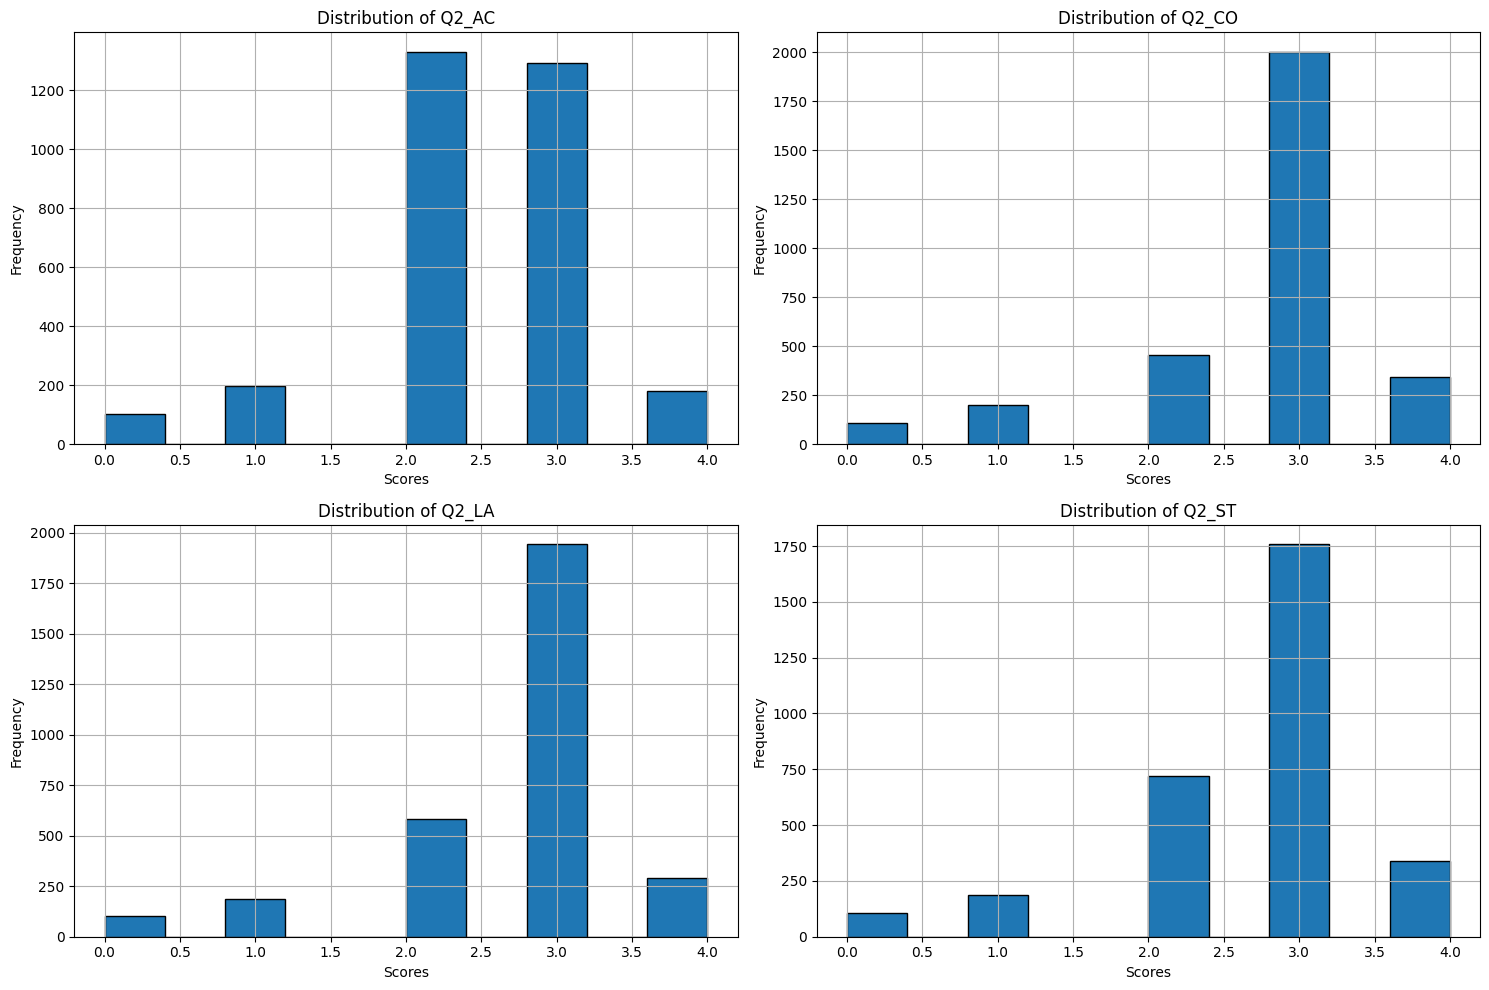

In [7]:
import matplotlib.pyplot as plt

score_columns = ['Q2_AC', 'Q2_CO', 'Q2_LA', 'Q2_ST']
plt.figure(figsize=(15, 10))

for i, column in enumerate(score_columns, 1):
    plt.subplot(2, 2, i)
    train_df[column].hist(bins=10, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

          Q2_AC     Q2_CO     Q2_LA     Q2_ST
Q2_AC  1.000000  0.773788  0.800657  0.798835
Q2_CO  0.773788  1.000000  0.848228  0.835571
Q2_LA  0.800657  0.848228  1.000000  0.821395
Q2_ST  0.798835  0.835571  0.821395  1.000000


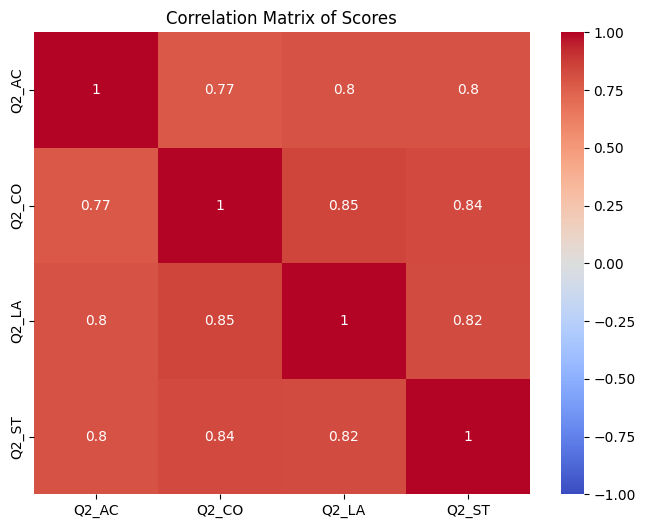

In [8]:
import seaborn as sns
correlation_matrix = train_df[['Q2_AC', 'Q2_CO', 'Q2_LA', 'Q2_ST']].corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Scores')
plt.show()

In [9]:

sentence_length = [len(str(i)) for i in train_df["Response"]]
print("max length:", max(sentence_length))
print("min length:", min(sentence_length))
print("median length:", np.median(sentence_length))
print("average length:", np.mean(sentence_length))

print("90% sentence length:",np.percentile(sentence_length,90))

max length: 3853
min length: 0
median length: 1479.0
average length: 1487.2073406310367
90% sentence length: 1936.5


In [11]:
nrows = train_df.shape[0]
count_zeros=0
for i in range(nrows):
    essay = train_df["Response"].iloc[i]
    total_score = train_df.loc[i, ["Q2_AC", "Q2_CO", "Q2_LA", "Q2_ST"]].sum()
    if total_score == 0:
        count_zeros += 1
        print(len(str(essay)), essay, "Total score:",total_score)
print("Total count of 0s:",count_zeros)

439 I Disagree when my friends says that homework is a waste of time. This is a problem not only because it can harm my performance at school, and it causes me  to receive lower grades, but also because it can cause me to suffer from various other issues, such as frustration, stress, and even saying that its too hard. But when I force myself to do my homework I get higher grades and gaining new skills, and build up my confidence.



 



  Total score: 0
0  Total score: 0
71 i think homework is a waste of time because we go to school for 6 hours Total score: 0
141 i think home work is a waste of time as teachers get mad at sudtes for sleeping in class, even tho they get homework form 1-4 classes a day.  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
430 Hi , I am Batoul ,I am 15 years old , I have 2 brothers and one sister , in the past i was have many best friends , but know i don't because i wiil to reste all my life alone , oh right i don't best friend and i do

In [12]:
# check the essays shorter than 150 words
short_essay_len = 4.5 * 150
count_short=0
for i in range(nrows):
    essay = train_df["Response"].iloc[i]
    total_score = train_df.loc[i, ["Q2_AC", "Q2_CO", "Q2_LA", "Q2_ST"]].sum()
    if len(str(essay) )< 200:
        count_short += 1
        print(len(str(essay)), essay, "Total score:",total_score)
print("Total count of 0s:",count_short)

# conclusion: essay charactor length shorter than 200 are marked as 0. This rule can apply to test dataset directly.

0  Total score: 0
71 i think homework is a waste of time because we go to school for 6 hours Total score: 0
141 i think home work is a waste of time as teachers get mad at sudtes for sleeping in class, even tho they get homework form 1-4 classes a day.  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
196 Doing your homework is good because you learn more and do more especially with maths maths can be really challenging but can help you in life also with writing.All those things come handy in life. Total score: 0
76 Do you agree that everyone should learn how to cook food?
 
In my opinion I  Total score: 0
172 Why should everyone have to do homework
 
I disagree with the statement "Homework is a waste of time" beause homework improves your learning skills and basic requirements.  Total score: 0


0  Total score: 0
0  Total score: 0
136 "family and friends"  this is are very importante for me, for you, for de all word
if you have this 2 things, so, you don't need anymore Total score: 0
133 Everyone should learn how to prepare and cook food as this is a great way to make yourself a better person as this can make yourself  Total score: 0
121 I disagree that homework is a waste of time because it may seem tedious at first but, in the long run, it helps out a lot Total score: 0
0  Total score: 0
18 agree cost of food Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
65 Homework is a waste of time, I disagree.Homework can help myself  Total score: 0
41 every body should mke there own decesions Total score: 0
1 ? Total score: 0
0  Total score: 0
0  Total score: 0
5 ..... Total score: 0
16 Achievement.
 
  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
0  Total score: 0
30 H

In [13]:
nrows = train_df.shape[0]
longest_essay = []
for i in range(nrows):
    essay = train_df["Response"].iloc[i]
    
    if len(str(essay) ) > 1345:
        longest_essay.append(True)
    else:
        longest_essay.append(False)
essay_long = train_df[longest_essay]  
print(essay_long)

       Unique_ID                                           Response  Q2_AC  \
0     6810901775  The Ups And Downs Of School Homework. \n \nIs ...      3   
1     6812396907  In the majority of schools around the globe, s...      3   
2     6612442013  I believe that homework is a wast of time. Whe...      3   
3     6814308384   \nGood afternoon Westlake Girls high school s...      2   
4     6814216893  Why homework is a waste of time.\n \nHello fel...      2   
...          ...                                                ...    ...   
3100  6831929732  The Christmas is coming up and I can't wait to...      3   
3102  6812380498  Is homework a waste of time? Students think it...      3   
3103  6704323204  Homework is not a waste of time\n - I disagree...      2   
3104  6825394559  Everyone should know how to cook food. Do you ...      2   
3105  6827882027  This argument has been around for decades betw...      3   

      Q2_CO  Q2_LA  Q2_ST  
0         3      3      3  
1      

In [14]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
essay_text = essay_long["Response"].iloc[1]

# Tokenize the essay
tokens = tokenizer.encode_plus(
    essay_text,
    add_special_tokens=True,
    truncation=True
)

# Print the number of tokens
print(f"Number of tokens: {len(tokens['input_ids'])}")

/Users/JessieD/miniconda3/envs/nlp_311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of tokens: 339


In [5]:
embeddings = pd.read_csv("output/trained_model/bertbase/bert_embeddings_Q1.csv")
embeddings.shape


(3113, 7)

In [6]:
embeddings.head()

,Unique_ID,Response,AC,CO,LA,ST,Embedding
0,6903086772,"Dear Anahera Quinn, \nMy name is Gracy Patel a...",4.0,5.0,4.0,5.0,"tensor(6831173653),[-0.7078692 -0.6635655 -0..."
1,6814957487,Dear Anahera Quinn\n \nI am writing this email...,4.0,4.0,4.0,4.0,"tensor(6833514901),[-0.8040581 -0.617949 -0..."
2,6814959051,Dear Anahera Quinn\n \nHello my name is Tyrese...,4.0,4.0,4.0,4.0,"tensor(6827647648),[-0.37436762 -0.55181444 -0..."
3,6816734129,"Dear Anahera Quinn,\n \nMy name is Hannah Fene...",4.0,4.0,4.0,4.0,"tensor(6814216893),[-0.6197169 -0.63102055 -0..."
4,6827882909,"Dear Anahera Quinn,\n \nHi, Isla Smith here,I ...",4.0,4.0,4.0,4.0,"tensor(6814215040),[-4.56805944e-01 -6.3016450..."
